In [38]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

In [61]:
import matplotlib 

matplotlib.font_manager._rebuild()

plt.rc("font", family="Malgun Gothic")

In [39]:
day = pd.read_csv('1번_일별_데이터.csv')
day

,base_date,emd_nm,em_cnt,em_g,pay_amt
0,2018-01-01,건입동,668,1708250,51079
1,2018-01-01,남원읍,304,1239600,37110
2,2018-01-01,노형동,3903,9357900,278317
3,2018-01-01,대륜동,650,1717700,50076
4,2018-01-01,대정읍,309,1264950,37872
...,...,...,...,...,...
50517,2021-06-30,표선면,370,1377450,41235
50518,2021-06-30,한경면,269,973850,29152
50519,2021-06-30,한림읍,870,3298100,98740
50520,2021-06-30,화북동,2255,3749600,111933


In [40]:
visit = pd.read_csv('내국인_유동인구.csv')
visit['resd_pop_cnt'] = visit['man_resd_pop_cnt']+visit['woman_resd_pop_cnt']
visit['in_work_pop_cnt'] = visit['man_work_pop_cnt']+visit['woman_work_pop_cnt']
visit['in_visit_pop_cnt'] = visit['man_visit_pop_cnt']+visit['woman_visit_pop_cnt']
visit['out_work_pop_cnt'] = visit['outman_work_pop_cnt']+visit['outwoman_work_pop_cnt']
visit['out_visit_pop_cnt'] = visit['outman_visit_pop_cnt']+visit['outwoman_visit_pop_cnt']
visit['work_pop_cnt'] = visit['in_work_pop_cnt'] +visit['out_work_pop_cnt']
visit['visit_pop_cnt'] = visit['in_visit_pop_cnt']+visit['out_work_pop_cnt']

In [41]:
card = pd.read_csv('카드_전부.csv')
card

,base_date,month,emd_nm,use_cnt,use_amt,"('use_cnt', '간식')","('use_cnt', '농축수산물')","('use_cnt', '마트/슈퍼마켓')","('use_cnt', '배달')","('use_cnt', '부페')",...,"('use_amt', '농축수산물')","('use_amt', '마트/슈퍼마켓')","('use_amt', '배달')","('use_amt', '부페')","('use_amt', '식품')","('use_amt', '아시아음식')","('use_amt', '양식')","('use_amt', '주점및주류판매')","('use_amt', '패스트푸드')","('use_amt', '한식')"
0,2018-01-01,1,건입동,1806,61606900,79.0,34.0,589.0,5.0,0.0,...,1824556.0,19891147.0,54010.0,0.0,6831676.0,1836340.0,2250744.0,371196.0,1802952.0,25816289.0
1,2018-01-01,1,구좌읍,1180,43303254,79.0,25.0,329.0,5.0,0.0,...,1466175.0,11489793.0,66285.0,0.0,9145022.0,1627174.0,400165.0,0.0,522326.0,17660288.0
2,2018-01-01,1,남원읍,1581,69402997,108.0,54.0,466.0,25.0,5.0,...,2199680.0,24828201.0,644192.0,294600.0,16392477.0,1854998.0,685927.0,98200.0,1365176.0,19474238.0
3,2018-01-01,1,노형동,12507,403571632,1007.0,216.0,4905.0,123.0,15.0,...,12964266.0,168640726.0,2185932.0,2770222.0,32230959.0,16315635.0,9566325.0,1807862.0,17550255.0,129584867.0
4,2018-01-01,1,대륜동,2032,72541912,128.0,29.0,859.0,20.0,0.0,...,354993.0,37971731.0,396728.0,0.0,3178292.0,3405576.0,2081644.0,262685.0,3380044.0,19997939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56183,2021-06-30,6,표선면,1336,90632868,60.0,35.0,423.0,75.0,0.0,...,25487010.0,38310391.0,1855783.0,0.0,6781949.0,653900.0,1166960.0,1063845.0,816369.0,13866905.0
56184,2021-06-30,6,한경면,1286,45263612,80.0,20.0,423.0,40.0,0.0,...,4176912.0,17679746.0,697661.0,0.0,7528753.0,1167966.0,842022.0,125750.0,1155391.0,6915244.0
56185,2021-06-30,6,한림읍,3044,130156819,136.0,80.0,669.0,257.0,5.0,...,13545991.0,42071373.0,5508665.0,183344.0,26230243.0,2325369.0,4334225.0,0.0,3257428.0,30940536.0
56186,2021-06-30,6,화북동,5644,191816310,362.0,352.0,1645.0,644.0,0.0,...,46895646.0,48460831.0,13370520.0,0.0,21022684.0,5774943.0,1997413.0,416987.0,4305680.0,45292736.0


In [42]:
food =pd.read_csv('월별_음식카드.csv')
food['base_date'] = pd.to_datetime(food['base_date'])

In [43]:
alldata = pd.merge(day,visit,on=['base_date','emd_nm'],how='left')

In [44]:
alldata1 =  pd.merge(alldata,card,on=['base_date','emd_nm'],how='left')

In [45]:
alldata1['base_date'] = pd.to_datetime(alldata1['base_date'])
alldata1['month'] = alldata1['base_date'].dt.month

In [46]:
alldata1['year'] = alldata1['base_date'].dt.year
alldata1['day'] = alldata1['base_date'].dt.day
alldata1['week'] = alldata1['base_date'].dt.week
alldata1['weekday'] = alldata1['base_date'].dt.dayofweek
alldata1['Week_num']=np.ceil(alldata1['day']/7)

alldata1['time'] = alldata1['base_date'].dt.date - alldata1['base_date'].dt.date.min()
alldata1['time'] = alldata1['time'].apply(lambda x : x.days)
alldata1 = alldata1.drop(columns=['base_date'])

<ipython-input-46-2119fd3fff50>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  alldata1['week'] = alldata1['base_date'].dt.week


In [52]:
alldata1

,emd_nm,em_cnt,em_g,pay_amt,man_resd_pop_cnt,man_work_pop_cnt,man_visit_pop_cnt,woman_resd_pop_cnt,woman_work_pop_cnt,woman_visit_pop_cnt,...,"('use_amt', '양식')","('use_amt', '주점및주류판매')","('use_amt', '패스트푸드')","('use_amt', '한식')",year,day,week,weekday,Week_num,time
0,건입동,668,1708250,51079,84744.8701,11638.6479,95737.5602,85324.4591,7335.6288,86268.1594,...,2250744.0,371196.0,1802952.0,25816289.0,2018,1,1,0,1.0,0
1,남원읍,304,1239600,37110,152384.8823,10995.4261,108160.7162,132073.3097,6727.0772,105680.3226,...,685927.0,98200.0,1365176.0,19474238.0,2018,1,1,0,1.0,0
2,노형동,3903,9357900,278317,567232.7968,35126.5886,221249.7767,604264.9052,36706.3146,203360.6607,...,9566325.0,1807862.0,17550255.0,129584867.0,2018,1,1,0,1.0,0
3,대륜동,650,1717700,50076,124968.7721,11301.7721,100900.0818,139747.2482,8660.3649,107820.8461,...,2081644.0,262685.0,3380044.0,19997939.0,2018,1,1,0,1.0,0
4,대정읍,309,1264950,37872,193600.9308,8824.8812,78193.3105,169504.9909,7085.2994,76023.4700,...,3508244.0,0.0,2185441.0,20044093.0,2018,1,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50517,표선면,370,1377450,41235,123817.9381,14018.5155,82469.6690,115466.4421,9502.4429,75581.9336,...,1166960.0,1063845.0,816369.0,13866905.0,2021,30,26,2,5.0,1276
50518,한경면,269,973850,29152,88602.5648,8791.6569,52753.3357,78815.2963,7237.9656,45812.9111,...,842022.0,125750.0,1155391.0,6915244.0,2021,30,26,2,5.0,1276
50519,한림읍,870,3298100,98740,247501.5803,31471.0957,148131.6335,222983.3985,17722.0108,138819.5661,...,4334225.0,0.0,3257428.0,30940536.0,2021,30,26,2,5.0,1276
50520,화북동,2255,3749600,111933,277288.5428,30268.6911,138252.9350,295212.0508,19883.9228,102795.4549,...,1997413.0,416987.0,4305680.0,45292736.0,2021,30,26,2,5.0,1276


In [53]:
le = LabelEncoder()

c = alldata1.columns[alldata1.dtypes == 'object']
for i in c:
    alldata1[i] = le.fit_transform(alldata1[i])

In [62]:
alldata1

,emd_nm,em_cnt,em_g,pay_amt,man_resd_pop_cnt,man_work_pop_cnt,man_visit_pop_cnt,woman_resd_pop_cnt,woman_work_pop_cnt,woman_visit_pop_cnt,...,"('use_amt', '양식')","('use_amt', '주점및주류판매')","('use_amt', '패스트푸드')","('use_amt', '한식')",year,day,week,weekday,Week_num,time
0,0,668,1708250,51079,84744.8701,11638.6479,95737.5602,85324.4591,7335.6288,86268.1594,...,2250744.0,371196.0,1802952.0,25816289.0,2018,1,1,0,1.0,0
1,2,304,1239600,37110,152384.8823,10995.4261,108160.7162,132073.3097,6727.0772,105680.3226,...,685927.0,98200.0,1365176.0,19474238.0,2018,1,1,0,1.0,0
2,3,3903,9357900,278317,567232.7968,35126.5886,221249.7767,604264.9052,36706.3146,203360.6607,...,9566325.0,1807862.0,17550255.0,129584867.0,2018,1,1,0,1.0,0
3,4,650,1717700,50076,124968.7721,11301.7721,100900.0818,139747.2482,8660.3649,107820.8461,...,2081644.0,262685.0,3380044.0,19997939.0,2018,1,1,0,1.0,0
4,5,309,1264950,37872,193600.9308,8824.8812,78193.3105,169504.9909,7085.2994,76023.4700,...,3508244.0,0.0,2185441.0,20044093.0,2018,1,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50517,37,370,1377450,41235,123817.9381,14018.5155,82469.6690,115466.4421,9502.4429,75581.9336,...,1166960.0,1063845.0,816369.0,13866905.0,2021,30,26,2,5.0,1276
50518,38,269,973850,29152,88602.5648,8791.6569,52753.3357,78815.2963,7237.9656,45812.9111,...,842022.0,125750.0,1155391.0,6915244.0,2021,30,26,2,5.0,1276
50519,39,870,3298100,98740,247501.5803,31471.0957,148131.6335,222983.3985,17722.0108,138819.5661,...,4334225.0,0.0,3257428.0,30940536.0,2021,30,26,2,5.0,1276
50520,40,2255,3749600,111933,277288.5428,30268.6911,138252.9350,295212.0508,19883.9228,102795.4549,...,1997413.0,416987.0,4305680.0,45292736.0,2021,30,26,2,5.0,1276


In [66]:
heat = alldata1.drop(columns = ['emd_nm','year','day','week','Week_num','time','month','weekday'])

<AxesSubplot:>

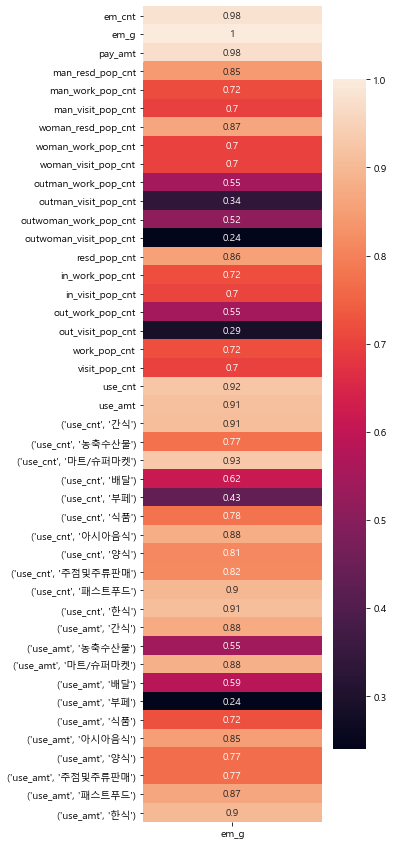

In [69]:
fig = plt.figure(figsize=(4, 15))
sns.heatmap(heat.corr()[['em_g']], annot=True)

In [71]:
alldata2 = alldata1.drop(columns = 'em_g')

In [79]:
x_train, x_valid, y_train, y_valid = train_test_split(alldata2, alldata1['em_g'], test_size = 0.2, random_state = 40)

In [80]:
cbr = CatBoostRegressor(verbose = 100)

In [81]:
cbr.fit(x_train,y_train , eval_set = (x_valid, y_valid))

Learning rate set to 0.09271
0:	learn: 1807959.8746519	test: 1815947.4277821	best: 1815947.4277821 (0)	total: 16.3ms	remaining: 16.3s
100:	learn: 71291.1134600	test: 79920.5374764	best: 79920.5374764 (100)	total: 952ms	remaining: 8.47s
200:	learn: 53616.2335905	test: 68160.4718572	best: 68160.4718572 (200)	total: 1.89s	remaining: 7.52s
300:	learn: 46197.7004753	test: 65884.6048713	best: 65877.5200029 (299)	total: 2.85s	remaining: 6.61s
400:	learn: 41481.4490639	test: 65041.2431427	best: 65022.5803539 (398)	total: 3.8s	remaining: 5.68s
500:	learn: 38009.4985629	test: 64010.2040007	best: 63976.3891220 (498)	total: 4.78s	remaining: 4.76s
600:	learn: 35321.2662404	test: 63458.4633083	best: 63456.7394562 (597)	total: 5.74s	remaining: 3.81s
700:	learn: 33065.9189963	test: 62969.6244712	best: 62969.6244712 (700)	total: 6.67s	remaining: 2.84s
800:	learn: 31128.3143659	test: 62565.7958328	best: 62562.4771281 (799)	total: 7.61s	remaining: 1.89s
900:	learn: 29407.2679912	test: 62141.6992235	best:

In [82]:
pd.Series(cbr.feature_importances_,index = alldata2.columns).sort_values(ascending=False)

pay_amt                   68.424019
em_cnt                    16.343447
woman_resd_pop_cnt         4.596859
('use_cnt', '한식')          3.137867
('use_cnt', '마트/슈퍼마켓')     1.726354
('use_amt', '간식')          0.773090
('use_cnt', '간식')          0.737119
emd_nm                     0.671566
in_visit_pop_cnt           0.598952
time                       0.508604
('use_cnt', '농축수산물')       0.450209
use_cnt                    0.251408
outman_visit_pop_cnt       0.239367
man_resd_pop_cnt           0.232061
('use_amt', '한식')          0.177509
use_amt                    0.157443
('use_amt', '양식')          0.153694
resd_pop_cnt               0.123190
('use_amt', '패스트푸드')       0.117524
('use_amt', '마트/슈퍼마켓')     0.096440
month                      0.046074
man_visit_pop_cnt          0.042386
week                       0.037098
in_work_pop_cnt            0.035543
('use_cnt', '패스트푸드')       0.025909
out_visit_pop_cnt          0.025424
('use_cnt', '식품')          0.025332
outman_work_pop_cnt        0

<BarContainer object of 51 artists>

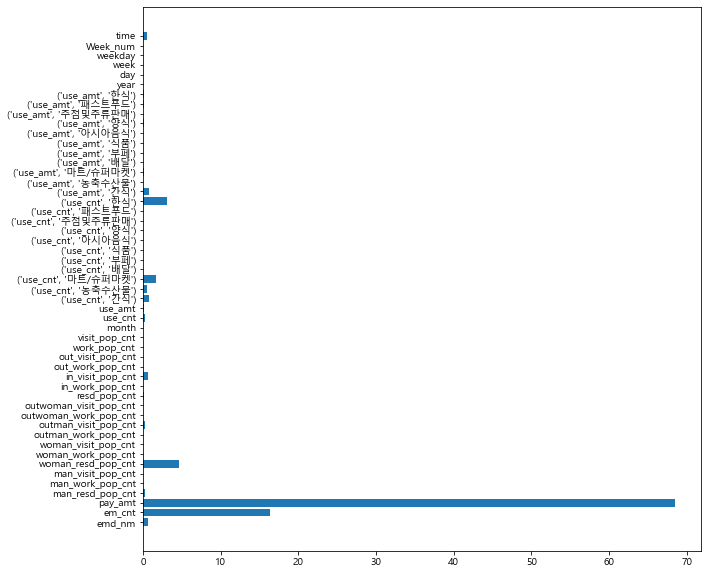

In [83]:
fig = plt.figure(figsize = (10,10))
plt.barh(alldata2.columns, cbr.feature_importances_)

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(alldata2, alldata1['em_g'], test_size = 0.2, random_state = 40)

In [18]:
xgb=XGBRegressor()

In [19]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=64, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<BarContainer object of 29 artists>

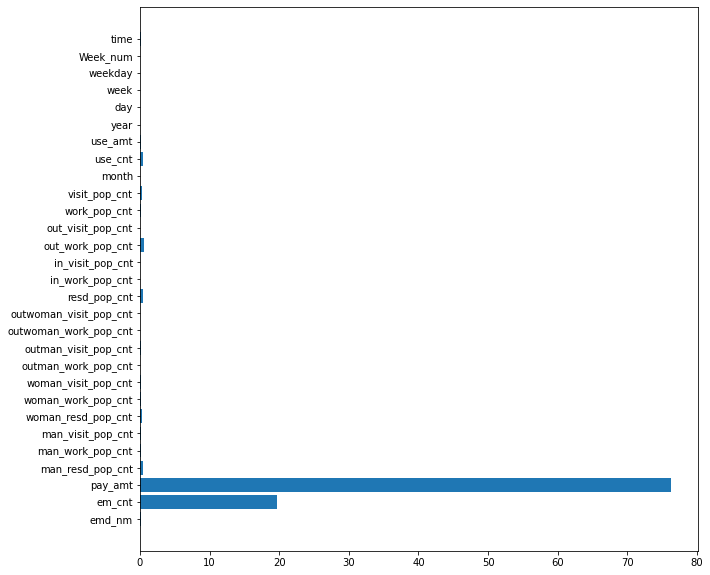

In [20]:
fig = plt.figure(figsize = (10,10))
plt.barh(alldata2.columns, cbr.feature_importances_)

In [84]:
cvs = cross_val_score(cbr,alldata2, alldata1['em_g'], cv = 5, scoring = 'neg_mean_squared_error').mean()
rmse =  np.sqrt(cvs)
rmse

Learning rate set to 0.0754
0:	learn: 1780338.8056829	total: 14.9ms	remaining: 14.9s
100:	learn: 75782.1464507	total: 908ms	remaining: 8.08s
200:	learn: 57778.4691570	total: 1.8s	remaining: 7.15s
300:	learn: 49478.4508405	total: 2.67s	remaining: 6.2s
400:	learn: 44640.0598114	total: 3.52s	remaining: 5.26s
500:	learn: 41038.1787969	total: 4.39s	remaining: 4.37s
600:	learn: 38185.4612130	total: 5.25s	remaining: 3.49s
700:	learn: 35675.1792508	total: 6.11s	remaining: 2.61s
800:	learn: 33667.7679820	total: 7s	remaining: 1.74s
900:	learn: 32028.2817146	total: 7.9s	remaining: 868ms
999:	learn: 30726.4484969	total: 8.8s	remaining: 0us
Learning rate set to 0.0754
0:	learn: 1822907.8134319	total: 15ms	remaining: 14.9s
100:	learn: 73132.5975741	total: 911ms	remaining: 8.11s
200:	learn: 54439.6844652	total: 1.82s	remaining: 7.22s
300:	learn: 46752.2627531	total: 2.71s	remaining: 6.3s
400:	learn: 42472.9507111	total: 3.58s	remaining: 5.35s
500:	learn: 38992.6086100	total: 4.49s	remaining: 4.47s
60

nan

In [85]:
rmse =  np.sqrt(-cvs)
rmse

97212.85322125202

In [72]:
alldata3 = alldata2.drop(columns = ['pay_amt','em_cnt'])

In [73]:
x_train, x_valid, y_train, y_valid = train_test_split(alldata3, alldata1['em_g'], test_size = 0.2, random_state = 40)

In [74]:
cbr.fit(x_train,y_train , eval_set = (x_valid, y_valid))

Learning rate set to 0.09271
0:	learn: 1818850.2835940	test: 1827060.8227500	best: 1827060.8227500 (0)	total: 14.7ms	remaining: 14.7s
100:	learn: 416215.6387707	test: 425717.6991134	best: 425717.6991134 (100)	total: 881ms	remaining: 7.84s
200:	learn: 352366.3753016	test: 371354.2323999	best: 371354.2323999 (200)	total: 1.76s	remaining: 6.99s
300:	learn: 319481.0523879	test: 349822.8545572	best: 349822.8545572 (300)	total: 2.61s	remaining: 6.07s
400:	learn: 297366.1883923	test: 336760.8377760	best: 336760.8377760 (400)	total: 3.49s	remaining: 5.21s
500:	learn: 280738.5550760	test: 328109.0718482	best: 328038.2955778 (498)	total: 4.34s	remaining: 4.32s
600:	learn: 266356.6605802	test: 320867.7686205	best: 320867.7686205 (600)	total: 5.21s	remaining: 3.46s
700:	learn: 255017.4021041	test: 315897.4882599	best: 315894.1747579 (699)	total: 6.05s	remaining: 2.58s
800:	learn: 244925.7324054	test: 311602.2382029	best: 311576.5558149 (799)	total: 6.91s	remaining: 1.72s
900:	learn: 235791.1290604

<BarContainer object of 49 artists>

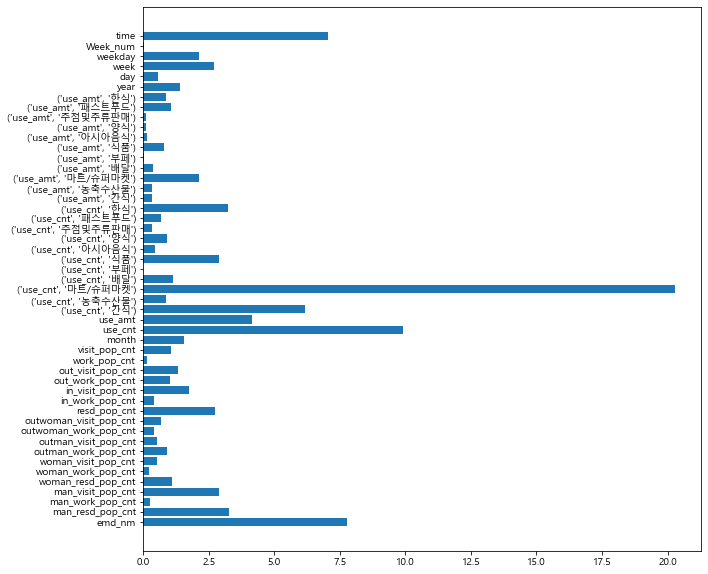

In [76]:
fig = plt.figure(figsize = (10,10))
plt.barh(alldata3.columns, cbr.feature_importances_)

In [77]:
cvs = cross_val_score(cbr,alldata3, alldata1['em_g'], cv = 5, scoring = 'neg_mean_squared_error').mean()
rmse =  np.sqrt(cvs)
rmse

Learning rate set to 0.0754
0:	learn: 1791815.2324522	total: 16ms	remaining: 16s
100:	learn: 431559.5536960	total: 872ms	remaining: 7.76s
200:	learn: 365398.3361136	total: 1.72s	remaining: 6.85s
300:	learn: 329412.9509353	total: 2.55s	remaining: 5.92s
400:	learn: 306364.0413296	total: 3.36s	remaining: 5.02s
500:	learn: 288805.5517018	total: 4.22s	remaining: 4.21s
600:	learn: 275212.9022128	total: 5.04s	remaining: 3.35s
700:	learn: 264197.5810466	total: 5.89s	remaining: 2.51s
800:	learn: 253650.6128403	total: 6.72s	remaining: 1.67s
900:	learn: 245085.6644152	total: 7.57s	remaining: 831ms
999:	learn: 237523.3242640	total: 8.39s	remaining: 0us
Learning rate set to 0.0754
0:	learn: 1837591.7001501	total: 20.6ms	remaining: 20.6s
100:	learn: 423102.7517148	total: 900ms	remaining: 8.01s
200:	learn: 364552.0698518	total: 1.78s	remaining: 7.08s
300:	learn: 329540.6548375	total: 2.69s	remaining: 6.25s
400:	learn: 304338.7157864	total: 3.57s	remaining: 5.33s
500:	learn: 286898.2223261	total: 4.48

nan

In [78]:
rmse =  np.sqrt(-cvs)
rmse

481613.13185244054